In [1]:
from datetime import datetime
from pathlib import Path

import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

In [ ]:
ROOT_DIR = Path.cwd().parent.parent
DATA_DIR = ROOT_DIR / "data"
TRANSLATION_DIR = ROOT_DIR / "notebooks" / "diego" / "input" / "column_translation"

# list all files in the data directory
for file in list(DATA_DIR.iterdir()):
    if not file.name.endswith("#"):
        print(file.name)

In [9]:
df = pd.read_csv("data_retentioneering.csv")

# group timestamp by day
df["timestamp"] = pd.to_datetime(df["timestamp"]).dt.date

# Group by date and sum the number of rows
data = df.groupby("timestamp").count().reset_index()[["timestamp", "fingerprint"]]
data.columns = ["ds", "y"]

In [11]:
# Example from https://facebook.github.io/prophet/docs/quick_start.html#python-api
m = Prophet()
m.fit(data)

08:51:51 - cmdstanpy - INFO - Chain [1] start processing
08:51:51 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
# Generate future dates
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
266,2023-05-03
267,2023-05-04
268,2023-05-05
269,2023-05-06
270,2023-05-07


In [18]:
# Make predictions
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
266,2023-05-03,21.644701,-28.712081,73.420663
267,2023-05-04,26.350004,-21.895731,73.531905
268,2023-05-05,19.940471,-27.967028,71.158791
269,2023-05-06,-4.570147,-53.349510,41.231421
270,2023-05-07,-2.120031,-54.370588,47.635425


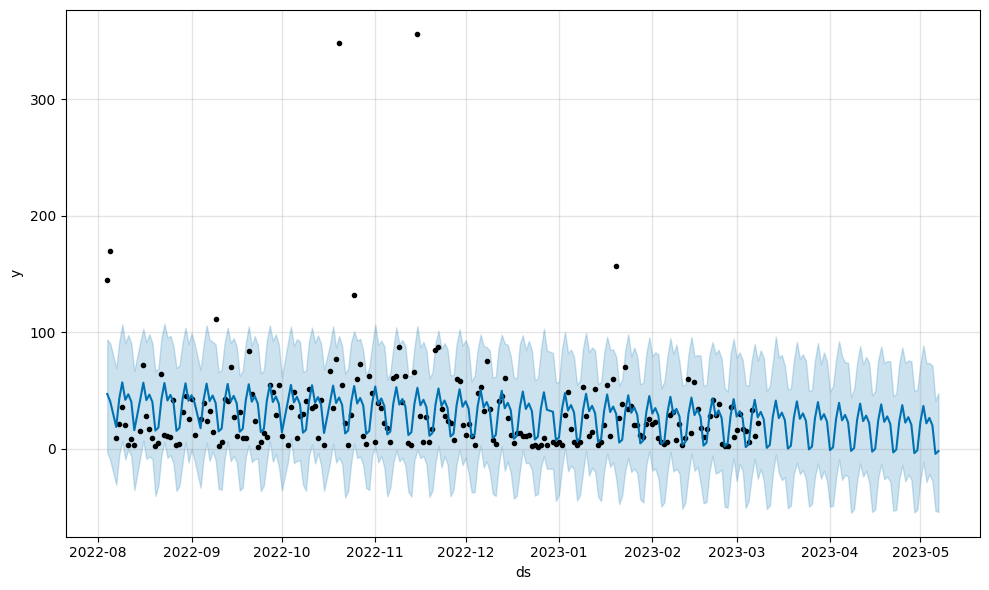

In [19]:
fig1 = m.plot(forecast)

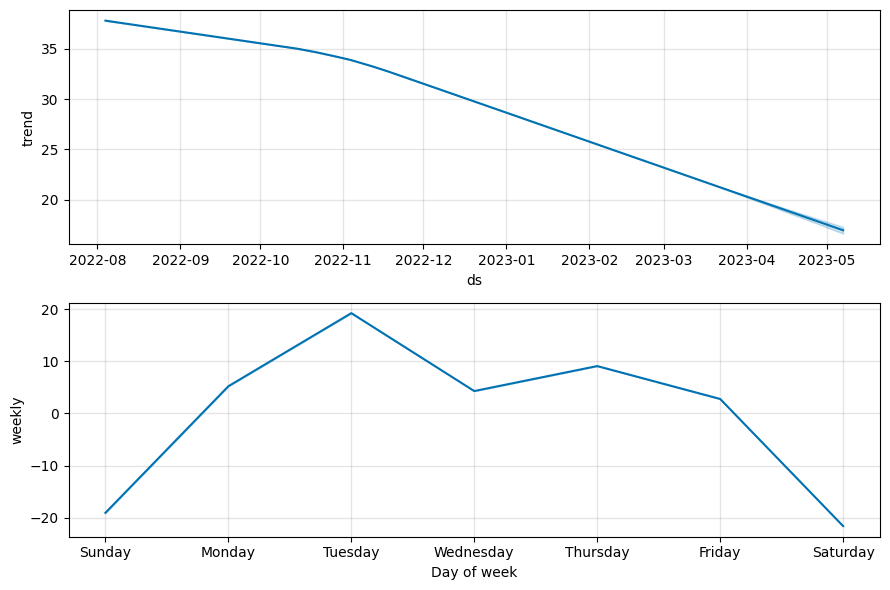

In [20]:
fig2 = m.plot_components(forecast)

In [21]:
plot_plotly(m, forecast)

In [22]:
plot_components_plotly(m, forecast)